<a href="https://colab.research.google.com/github/al34n1x/DataScience/blob/master/8.Machine_Learning/descriptores/1.transformaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a transformaciones de imágenes 

Una imagen es una función bidimensional `f(x,y)` donde `x` e `y` representan las coordenadas espaciales y el valor de `f`, la intensidad de la imagen en dicho punto. 

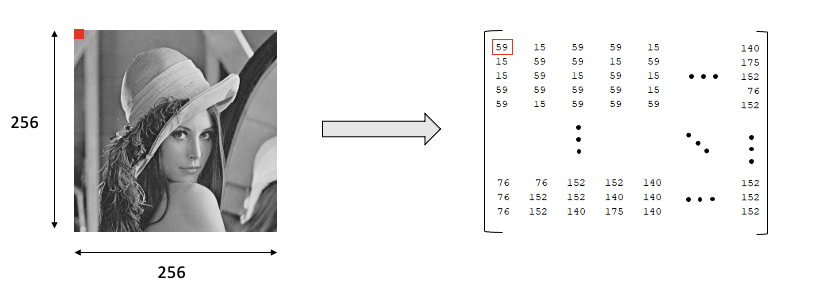

## Cómo se forma la imagen?
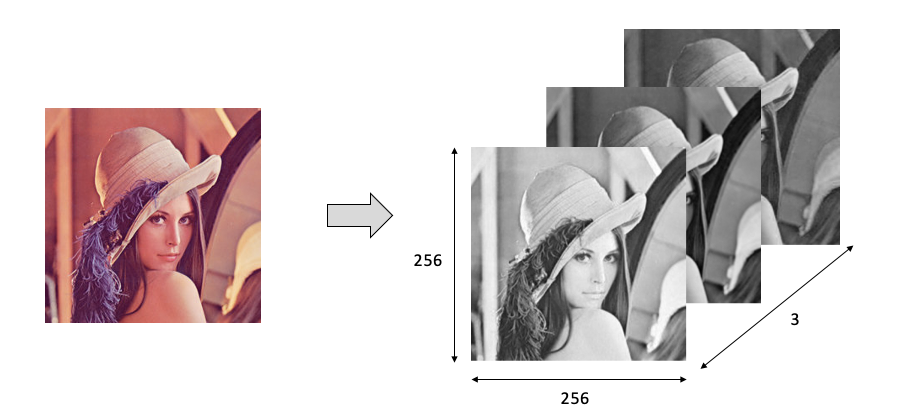

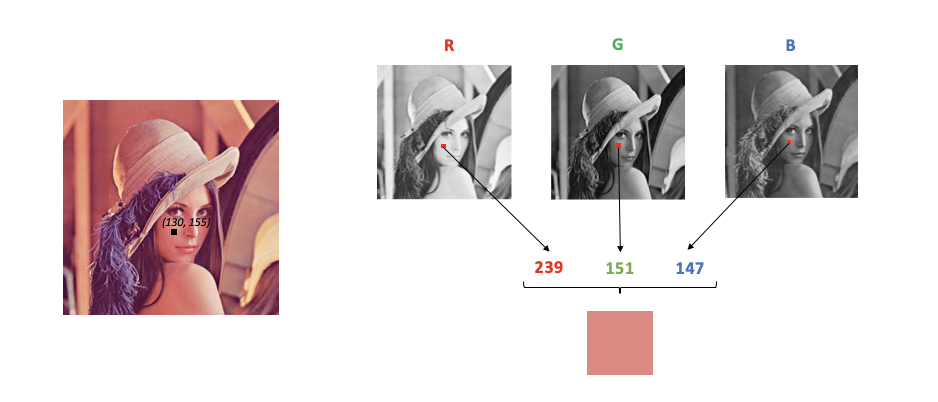

# Procesamiento de imágenes

Las operaciones de procesamiento de imágenes se pueden imaginar como un flujo de trabajo similar a la Figura. 
El flujo de trabajo comienza con la lectura de una imagen. Luego, la imagen se procesa utilizando operaciones de bajo o alto nivel. Las operaciones de bajo nivel operan en píxeles individuales. Dichas operaciones incluyen filtrado, morfología, umbralización, etc. 
Las operaciones de alto nivel incluyen comprensión de imágenes, reconocimiento de patrones, etc. Una vez procesadas, las imágenes se escriben en el disco o se visualizan. La visualización también se puede realizar durante el curso del procesamiento. 

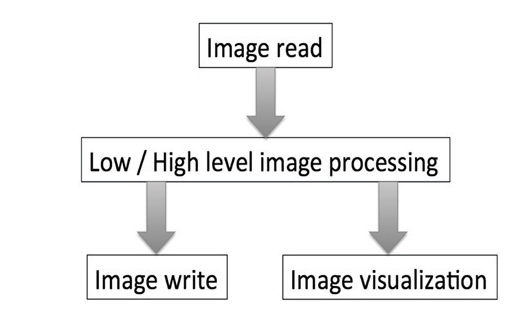


## Pixel

Se puede pensar en un píxel en una imagen como un cubo que recoge luz o electrones según el tipo de detector utilizado. Un solo píxel en una imagen abarca una distancia en el mundo físico. Por ejemplo, en la Figura debajo, las flechas indican el ancho y el alto de un píxel colocado junto a otros tres píxeles. En este caso, el ancho y la altura de este píxel es de 0,5 mm. Por lo tanto, en un espacio físico, recorrer una distancia de 0,5 mm equivale a recorrer 1 píxel en el espacio de píxeles. 
A todos los efectos prácticos, podemos suponer que los detectores tienen píxeles cuadrados, es decir, el ancho y la altura del píxel son iguales.

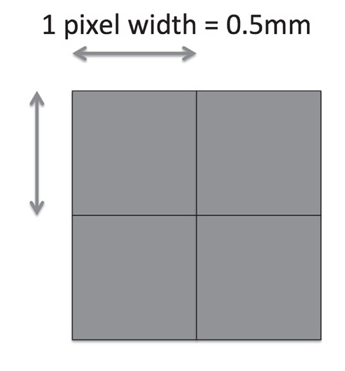

## Histograma

Un histograma es una representación gráfica de la distribución del valor de píxel en una imagen. La imagen de la Figura debajo es un histograma de una imagen. 
El eje `x` es el valor de píxel `y` el eje y es la frecuencia o el número de píxeles con el valor de píxel dado. En el caso de una imagen basada en números enteros como JPEG, cuyos valores abarcan [0, 255], la cantidad de valores en el eje `x` será 256. Cada uno de estos 256 valores se denomina "contenedor". También se pueden utilizar varios contenedores en el eje `x`. En el caso de imágenes que contengan valores de coma flotante, los contenedores tendrán un rango de valores.

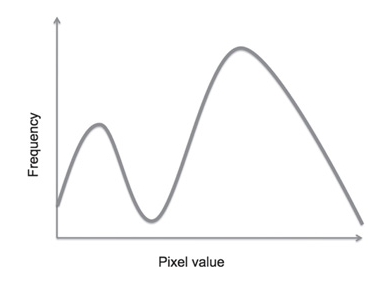

# OpenCV
OpenCV es una librería para leer y escribir imágenes, y el módulo PIL para leer imágenes y pyplot de Matplotlib para mostrar imágenes.

OpenCV se importa como `cv2`. Usamos la función `imread` para leer una imagen, que devuelve un `ndarray`. El `cv2.imread` admite los siguientes formatos de archivo:

- Mapas de bits de Windows: bmp, dib

- Archivos JPEG: jpeg, jpg, jpe

- Archivos JPEG 2000: jp2

- Gráficos de red portátiles: png

- Formato de imagen portátil: pbm, pgm, ppm

- Archivos TIFF: tiff, tif

In [ ]:
# READ AN IMAGE
# pip install opencv-python
import matplotlib.pyplot as plt
import cv2
import numpy as np

img = cv2.imread('images/Lena_RGB.png')
print('Image dimensions: ', np.shape(img))

plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
# Extraer por separado la imagen de grises de cada canal (B G R)
R = img[:,:,2] #Tercer Canal R
G = img[:,:,1] #Segundo Canal G
B = img[:,:,0] #Primer Canal B

In [ ]:
# Visualizar los canales en un subplot
fig, ax = plt.subplots(1,3)
ax[0].imshow(R, cmap='gray'), ax[0].set_title('Red')
ax[1].imshow(G, cmap='gray'), ax[1].set_title('Green')
ax[2].imshow(B, cmap='gray'), ax[2].set_title('Blue')
plt.show()

Cuando el archivo de imagen se lee con la función `imread()` de OpenCV, el orden de los colores es `BGR` (azul, verde, rojo). Por otro lado, en Pillow, se supone que el orden de los colores es `RGB` (rojo, verde, azul).

Por lo tanto, si desea utilizar tanto la función Pillow como la función OpenCV, debe convertir BGR y RGB.

In [ ]:
# Convertir BGR en RGB
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img, cmap='gray')
plt.show()

### TRANSFORMACIONES DE INTENSIDAD

In [ ]:
# CAMBIO DE BRILLO
img = cv2.imread('images/Lena_RGB.png')
img = img[:,:,2] # red color

mas_brillo = 50
menos_brillo = -100
mas_brillo_img = cv2.add(img, mas_brillo) # Importante el "cv2.add" en vez de "+"
menos_brillo_img = cv2.add(img, menos_brillo)

fig, ax = plt.subplots(1,3)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('original')
ax[1].imshow(mas_brillo_img, cmap='gray'), ax[1].set_title('más brillo')
ax[2].imshow(menos_brillo_img, cmap='gray'), ax[2].set_title('menos brillo')
plt.show()

In [ ]:
# CAMBIO DE CONTRASTE
img = cv2.imread('images/Lena_RGB.png')
img = img[:,:,1] # canal verde

contraste = -200

f = 131*(contraste + 127)/(127*(131-contraste)) 
alpha_c = f
gamma_c = 127*(1-f)

contrast_img = cv2.addWeighted(img, alpha_c, img, 0, gamma_c)

fig, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('original')
ax[1].imshow(contrast_img, cmap='gray'), ax[1].set_title('contraste')
plt.show()

# Para ver la imagen cuando se disminuye el contraste... 
cv2.imwrite('images/contrast.png', contrast_img)

### CONVERSIONES DEL ESPACIO DE COLOR

## RGB a CMYK

Al realizar un análisis de imágenes, puede resultar útil separar los canales individuales de una imagen y examinarlos por separado. El modelo de color CMYK es un modelo aditivo que se utiliza con frecuencia en la industria de la impresión comercial. En mi trabajo con el análisis de imágenes, he encontrado útil dividir y aislar canales CMYK.

CMYK significa cian, magenta, amarillo y clave (negro). Cada uno de estos canales se puede aislar en Python con un código relativamente simple.

In [ ]:
# RGB to CMYK
import numpy as np
from skimage import io

img = io.imread('images/colores.png')
rgb = img.copy()
rgb_p = rgb.astype('uint8')/255

with np.errstate(invalid='ignore', divide='ignore'):
    K = 1 - np.max(rgb_p, axis=2)
    # Extrae los canales de acuerdo con la ecuación del power point (RGB)
    
    C = (1 - (img[:,:,0]/255) - K)/(1-K)   # C = (1 - R' - K) / (1-K) - Donde R' = img[:,:,0]/255
    M = (1 - (img[:,:,1]/255) - K)/(1-K)   # M = (1 - G' - K) / (1-K) - Donde G' = img[:,:,1]/255
    Y = (1 - (img[:,:,2]/255) - K)/(1-K)   # Y = (1 - B' - K) / (1-K) - Donde B' = img[:,:,2]/255

CMYK = (np.dstack((C,M,Y,K)))
C,M,Y,K = cv2.split(CMYK)

fig, ax = plt.subplots(2,3)
ax[0,0].imshow(img, cmap='gray'), ax[0,0].set_title('original')
ax[0,1].imshow(CMYK.astype('uint8'), cmap='gray'), ax[0,1].set_title('CMYK')
ax[0,2].imshow(C.astype('uint8'), cmap='gray'), ax[0,2].set_title('cyan')
ax[1,0].imshow(M.astype('uint8'), cmap='gray'), ax[1,0].set_xlabel('magenta')
ax[1,1].imshow(Y.astype('uint8'), cmap='gray'), ax[1,1].set_xlabel('yellow')
ax[1,2].imshow(K.astype('uint8'), cmap='gray'), ax[1,2].set_xlabel('black')
plt.show()

In [ ]:
# Otras conversiones
# https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html

img = cv2.imread('images/Lena_RGB.png')

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # gray-scale

HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # (H)ue, (S)aturation and (V)alue

Lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab) # (L)uminosidad, a-b colores complementarios

YCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb) # Y-Luma, Cr-Cb crominancia rojo y azul


plt.imshow(YCrCb)
plt.show()

### TRANSFORMACIONES GEOMÉTRICAS

In [ ]:
# TRASLACIÓN
img = io.imread('images/GOT.png')
rows, cols, ch = img.shape
 
M = np.float32([[1,0,280],[0,1,-80]]) # Defino la matriz de transformación
new_img = cv2.warpAffine(img,M,(cols,rows)) # Aplico la transformación

figs, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('original')
ax[1].imshow(new_img, cmap='gray'), ax[1].set_title('traslación')
plt.show()

In [ ]:
# CROPPING
img = io.imread('images/GOT.png')

new_img = img[90:290, 200:305]

figs, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('original')
ax[1].imshow(new_img, cmap='gray'), ax[1].set_title('crop')
plt.show()

In [ ]:
# ROTACIÓN
img = io.imread('images/GOT.png')
rows, cols, ch = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),angle=45,scale=2) # Defino la matriz de transformación
new_img = cv2.warpAffine(img,M,(cols,rows)) # Aplico la transformación

figs, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('original')
ax[1].imshow(new_img, cmap='gray'), ax[1].set_title('rotación')
plt.show()

In [ ]:
# PERSPECTIVA
img = cv2.imread('images/sudoku.png')
rows, cols, ch = img.shape
 
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]]) #Puntos de interes ingresados manualmente (Pintados en rojo)
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])     #Puntos de interes ingresados manualmente (Pintados en Azul)

plt.imshow(img, cmap='gray')
for i in range(0,4):
    plt.plot(pts1[i,0], pts1[i,1], 'or', markersize=10)
    plt.plot(pts2[i,0], pts2[i,1], 'ob', markersize=10)
plt.title('Keypoints para perspectiva')
plt.show()
 
M = cv2.getPerspectiveTransform(pts1,pts2) # Defino la matriz de transformación
pers = cv2.warpPerspective(img,M,(305,305)) # Aplico la transformación
crop =  img[50:400,20:400]

figs, ax = plt.subplots(1,2)
ax[0].imshow(pers, cmap='gray'), ax[0].set_title('perspectiva')
ax[1].imshow(crop, cmap='gray'), ax[1].set_title('crop')
plt.show()


In [ ]:
# FLIPPING

# Leer la imagen "Lena_RGB.png" en formato RGB
img = cv2.imread('images/Lena_RGB.png')

# Voltear la imagen para conseguir las siguientes transformaciones. Utiliza el método "cv2.flip()"
  
flipVertical = cv2.flip(img, 0) #0 Vertical
flipHorizontal = cv2.flip(img, 1) #1 Horizontal
flipBoth = cv2.flip(img, -1) #<0 Ambos
 
figs, ax = plt.subplots(1,4)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('original')
ax[1].imshow(flipVertical, cmap='gray'), ax[1].set_title('flip vertical')
ax[2].imshow(flipHorizontal, cmap='gray'), ax[2].set_title('flip horizontal')
ax[3].imshow(flipBoth, cmap='gray'), ax[3].set_title('flip ambos')
plt.show()